# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import itertools

# To make output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")
    
data.head()

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

#### By analysing the high quantity spent on one type of product in comparison with lower quantity on other we can get a grasp of the type of establishment it can be and what it probably isn't.

In [3]:
# Let's create five categories in our data for each feature, i.e quintiles
purchase_categories = ["Very Low", "Low", "Median", "High", "Very High"]

# Let's check for big purchases of Fresh Products
quint_fresh = pd.qcut(data['Fresh'],
                     5, purchase_categories)

# Let's check for big purchases of Deli Products
quint_frozen = pd.qcut(data['Frozen'],
                     5, purchase_categories)

# Let's check big purchases of cleaning products
quint_cleaning = pd.qcut(data['Detergents_Paper'],
                                    5, purchase_categories)

In [4]:
data[quint_fresh == "Very High"].loc[quint_cleaning == "Low"].sort_values(by='Fresh', ascending=False).head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
129,42312,926,1510,1718,410,1819
285,40254,640,3600,1042,436,18
183,36847,43950,20170,36534,239,47943
427,31012,16687,5429,15082,439,1163
33,29729,4786,7326,6130,361,1083


In [5]:
data[quint_cleaning == "Very High"].sort_values(by="Detergents_Paper", ascending=False).head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
85,16117,46197,92780,1026,40827,2944
333,8565,4980,67298,131,38102,1215
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
47,44466,54259,55571,7782,24171,6465


In [6]:
data[quint_frozen == "Very High"].sort_values(by="Frozen", ascending=False).head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
325,32717,16784,13626,60869,1272,5609
183,36847,43950,20170,36534,239,47943
93,11314,3090,2062,35009,71,2698
196,30624,7209,4897,18711,763,2876
103,56082,3504,8906,18028,1480,2498


In [7]:
# Select three indices of your choice you wish to sample from the dataset
indices = [33, 333, 93]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,29729,4786,7326,6130,361,1083
1,8565,4980,67298,131,38102,1215
2,11314,3090,2062,35009,71,2698


In [8]:
# Visualize the samples along with the means

samples_mean = data.describe().loc['mean']

index = [1,2,3] + ['mean']

samples_with_mean = samples.copy()

samples_with_mean = samples_with_mean.append(samples_mean)

samples_with_mean.index = index

samples_with_mean.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
1,29729.000000,4786.000000,7326.000000,6130.000000,361.000000,1083.000000
2,8565.000000,4980.000000,67298.000000,131.000000,38102.000000,1215.000000
3,11314.000000,3090.000000,2062.000000,35009.000000,71.000000,2698.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


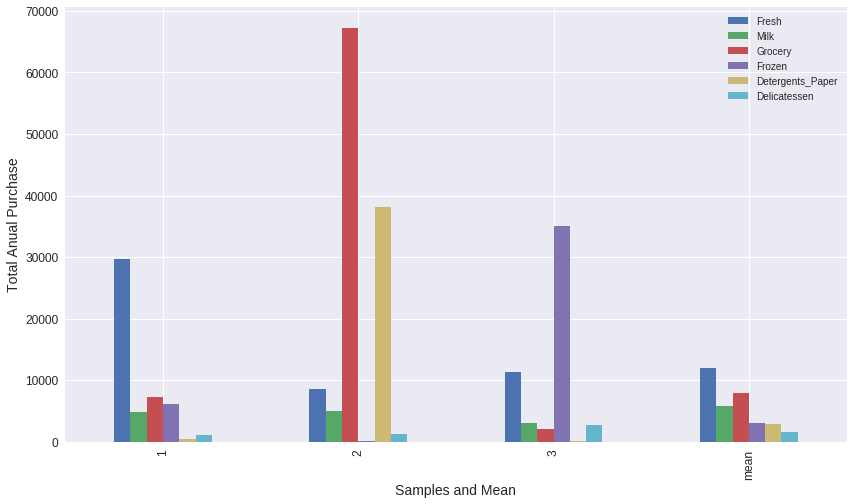

In [9]:
_ = samples_with_mean.plot(kind='bar', figsize=(14,8))
_ = plt.ylabel('Total Anual Purchase')
_ = plt.xlabel('Samples and Mean')
_ = plt.show()

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

 1. The first sample has above average purchases on *Fresh and Frozen Products*, and below average on the others. This could be a **Bakery, Restaurant or Cafe** serving all sorts of meals and fresh products.
 2. The second sample chosen has extremely high value in *Groceries and Detergents_Paper* with below average values in all others. This seems to be a **Grocery Store** but not a big retail Supermarket, since it doesn't have an above average milk purchase, very common on those places.
 3. The third sample has an extremely high value of purchases of *Frozen* products, a little below average value in *Fresh* products and very little on all others. This consumer needs to store a lot of Frozen Products, it could be  a **Butchery Shop** or **Barbecue Restaurant**, because meat has to be stored frozen, but also a **Fish Market**, considering also the purchases in Fresh products, or even an **Ice Cream Shop**.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [10]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

In [11]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
from sklearn.tree import DecisionTreeRegressor

for column in data.columns:

    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([column], axis=1)

    # Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = \
        train_test_split(new_data, data[column], test_size=0.25, random_state=42)

    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)

    regressor = regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)

    print("If we remove {} products, the R2 score is {:.3f}".format(column, score))

If we remove Fresh products, the R2 score is -0.386
If we remove Milk products, the R2 score is 0.156
If we remove Grocery products, the R2 score is 0.682
If we remove Frozen products, the R2 score is -0.210
If we remove Detergents_Paper products, the R2 score is 0.272
If we remove Delicatessen products, the R2 score is -2.255


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
* I tried to remove all features, one by one, and checked their R^2 scores. The chosen feature was the Delicatessen, given the lowest negative score
* The reported prediction scores were:

| Predicted Product | Score    |
| :------------------|:-----:  | 
| Fresh               | -0.386 |
| Milk                | 0.156  |
| Grocery             | 0.682  |
| Frozen              | -0.210 |
| Detergents          | 0.272  |
| Delicatessen        | **-2.255** |

* Given the lowest negative score on Delicatessen, our Regressor model completely failed to predict any spending habits on this product, given the spending on other products.  

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

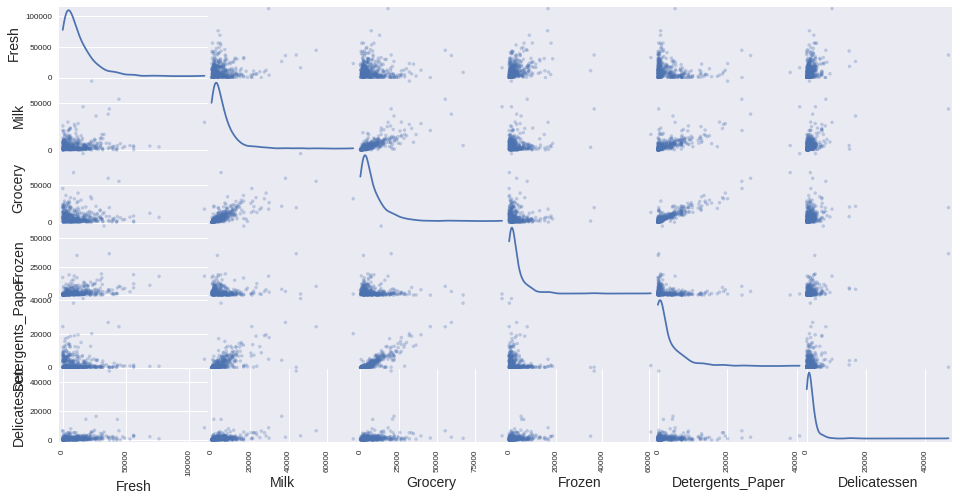

In [12]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (16,8), diagonal = 'kde');

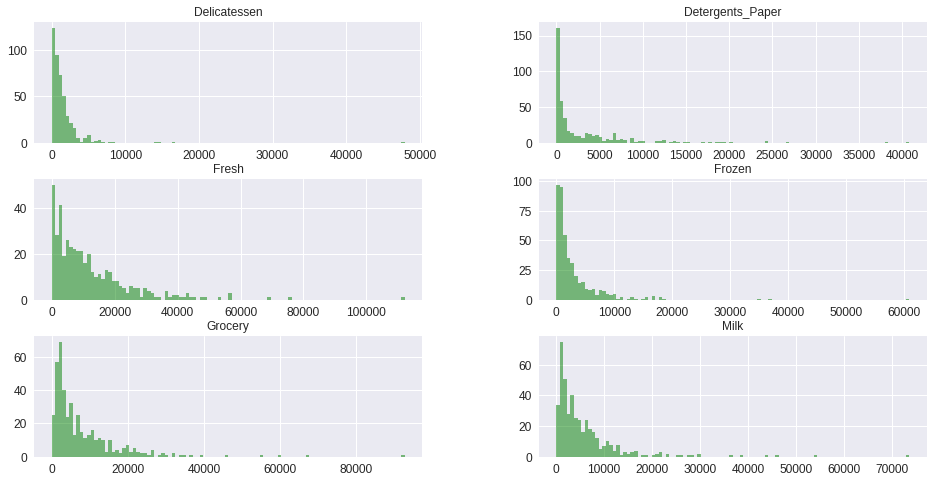

In [13]:
data.hist(bins=100, figsize=(16, 8), facecolor='green', alpha=0.5);

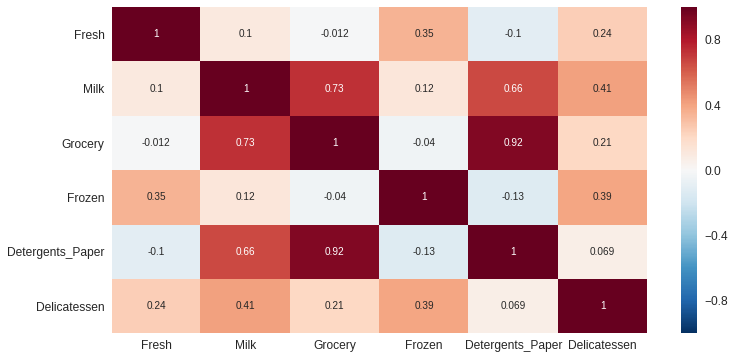

In [14]:
plt.figure(figsize=(12,6))
_ = sns.heatmap(data.corr(), annot=True)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to separate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
* By looking at the scatter matrix and the histogram, none of the features seems to be normally distributed, they are highly left-skewed. The most left-skewed of them is the Delicatessen, with a lot of samples near 0. 

 The heatmap clearly shows high positive correlation between the pairs:
 
  * **Grocery & Detergents_Paper (~0.92)**
  * **Grocery & Milk (~0.73)**
  * **Milk & Detergents_Paper (~0.66)**
  
 Mild Positive Correlation
 
  * **Delicatessen & Milk (~0.41)**
  * **Delicatessen & Frozen (~0.40)**
  * **Frozen & Fresh (~0.35)**
  
* The Mild Positive correlation between the Delicatessen, Frozen and Milk products make perfect sense, since a lot of deli products uses milk and frozen ingredients. Other than that there not much information about the spending habits in deli products from the other features.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

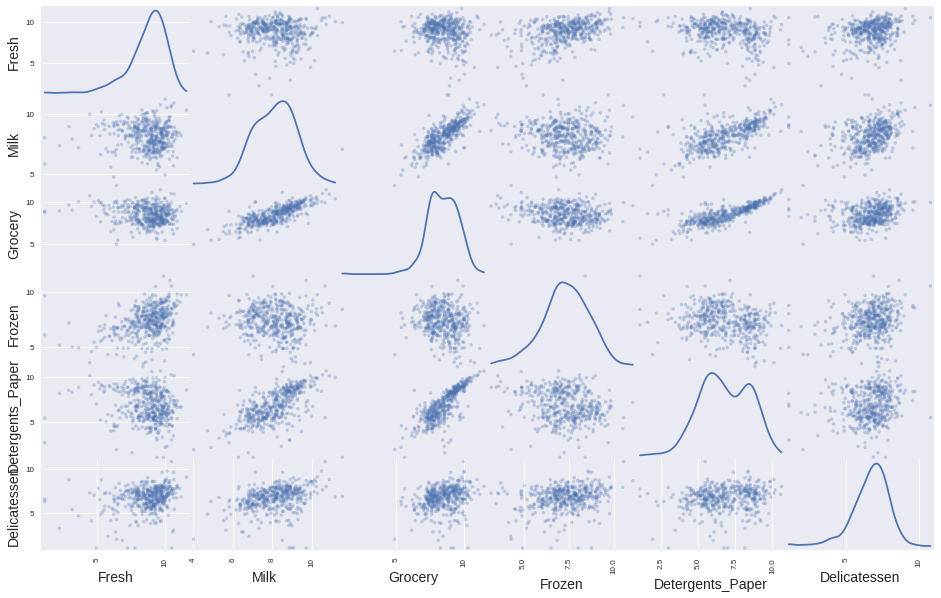

In [15]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (16,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [16]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.299878,8.473450,8.899185,8.720950,5.888878,6.987490
1,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499
2,9.333796,8.035926,7.631432,10.463360,4.262680,7.900266


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [17]:
# This dictionary will keep count of the index outliers 
count_outliers = {}

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    subset_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(subset_outliers)
    
    for i in subset_outliers.index:
        
        count_outliers[i] = count_outliers.get(i, 0) + 1
    
        # Another way to do the same
        # count_outliers[i]+=1 if i in count_outliers else count_outliers[i] = 1
   

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [18]:
# Uncomment this line and comment the following line to remove all outliers
# outliers  = list(count_outliers.keys())

# Uncomment this line to drop just the outliers which appear in more than one feature
outliers  = [k for k,v in count_outliers.items() if v  > 1]

print("Data points considered outliers in more than one feature")
log_data.loc[outliers]

Data points considered outliers in more than one feature


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


In [19]:
# Remove the outliers, if any were specified
good_data = log_data.drop(outliers).reset_index(drop = True)

good_data.shape

(435, 6)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

 1. Yes, the indices `65,66,75,128,154` are outlies in more than one feature. None of those multiple outliers belong to the samples chosen.
 2. These multiple data points should be removed, at least in a first model, since one of the goals of this project is to apply PCA to check the dimensions which best maximize the variance in the data, if we keep the samples which have two features or more as outliers, this would undermine the analysis by adding too much noise to the data and probably skewing the dimensions of maximum variance to those exact features with multiple outliers.
 3. In a first analysis I dropped just the outliers ocurring in more than one feature, but since there are extreme outliers ocurring within just one feature I decided to make a second run and eliminate all outliers even at a cost of ~10% of the data to see if the clustering was better able to differentiate the different segments without outliers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

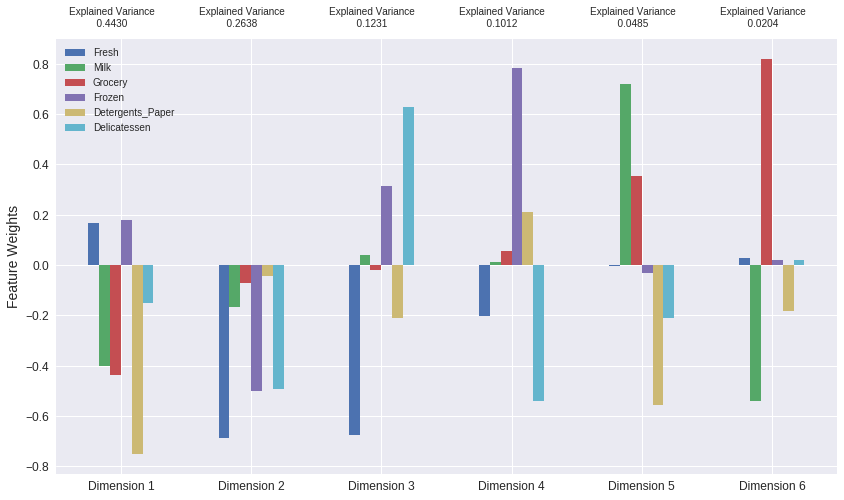

In [20]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns), random_state=42)

pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

** The sign in the second dimension seems to be reversed, since there is no positive correlation in the second one, I think it would make more sense if the dimension were rotated and the sign changed. This also seems to be the case in the first component where the majority of the correlation occurs negatively. **

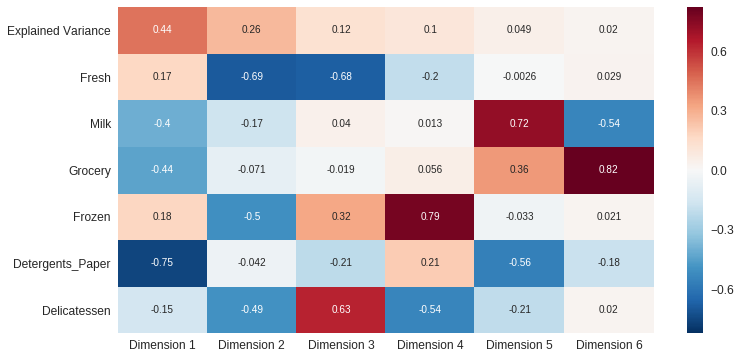

In [21]:
plt.figure(figsize=(12, 6))

_ = sns.heatmap(pca_results.transpose(), annot=True)

In [22]:
print("Cumulative Sum of Explained Variances:")

print(np.cumsum(pca.explained_variance_ratio_))

Cumulative Sum of Explained Variances:
[ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]


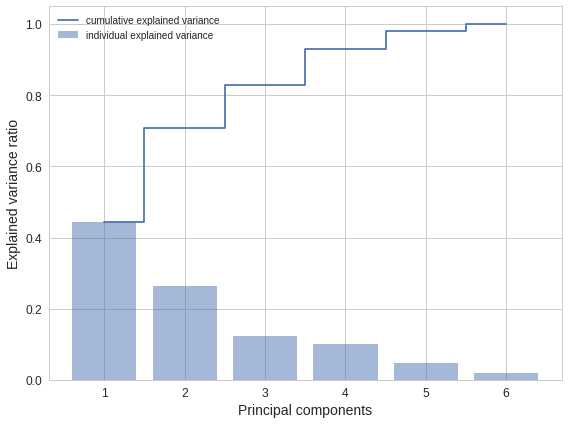

In [23]:
var_exp = pca.explained_variance_ratio_

cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

# Plot Code extracted from: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(1,7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(1,7), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

 1. `70.68%` of the total variance in the data is explained by the first and second components
 2. `93.10%` of the total variance in the data is explained by the first four principal components
 3.  The weights are the correlation of each feature with the Principal Components, any correlation large in magnitude, either positive or negative, indicate that the feature ( variance )is well represented by the dimension. Any correlation bigger than 0.5 ( absolute value ) is considered strong or high in importance here.
 *  **1st** component:
     * Positively correlated:
       * Weakly with Frozen and Fresh 
       
     * Negatively correlated:   
       * Strongly with **Detergents_Paper**
       * Mildly with Groceries and Milk 
       * Weakly with Delicatessen
          
     * The First Component increases weakly with purchases in Fresh and Frozen products and decreases strongly with purchases in cleaning producs, mildly with groceries and Milk, and weakly with deli products. This could be a greengrocery since the strong absence of cleaning products, groceries and milk - this products we buy at a supermarket, grocery store or even a small retail. The Fresh products could be fruits, greens and vegetables. The frozen products could be the fishes or seafood, because of the weak correlation, since this is not the bulk or focus of greengroceries or open markets.    
     
     *The Dimension rotated ( with the sign reversed ) would mean:* 
     
     Consumers who purchase Cleaning products, Groceries (such as cookies, bread and a whole bunch of dry or industrialized eating products ) and also Milk don't tend to buy Fresh and Frozen Products. This rotated component could represent a Grocery Store, Convenience Store or medium/small supermarket not focused on fresh products. This could also represent hotels since the high cost of cleaning products and the absence of Fresh or Frozen products.
     
 5. **2nd** component:
    * This component doesn't make much sense unless we interpret the rotated dimension with the signs inverted: Strong correlation of fresh products along with Frozen and Delicatessen products and low purchases of Milk, Groceries and Detergents_Paper. This Dimension could represent purchases of consumers such as Restaurants or Big Cafes
    
 6. **3rd** component:
    * This dimension increases strongly with Deli products and mildly with Frozen products and it decreases strongly with Fresh and mildly with Cleaning products. It doesn't correlate much to Milk or Groceryproducts. This could represent a Delicatessen, Bakery or Desert Shop.
    
 7. **4th** component:
     * This component increases strongly with Frozen Products and weakly with cleaning products. It decreases greatly with deli products and mildly with Fresh products. It doesn't represent much of Milk and Groceries purchases. This seems to represent a small retail shop ( convenience store ) since the negative weight of Fresh or Deli products ( those ones expire quickly ) and almost absence of Milk and Groceries in general.   

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [24]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.8147,-1.9456,-0.2164,0.4626,0.8007,0.4189
1,-4.5848,0.4149,-1.5408,-1.2655,-0.8767,1.2544
2,2.7797,-2.3743,1.9121,1.1165,0.6970,-0.0627


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [25]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=42).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [26]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [27]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.8147,-1.9456
1,-4.5848,0.4149
2,2.7797,-2.3743


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

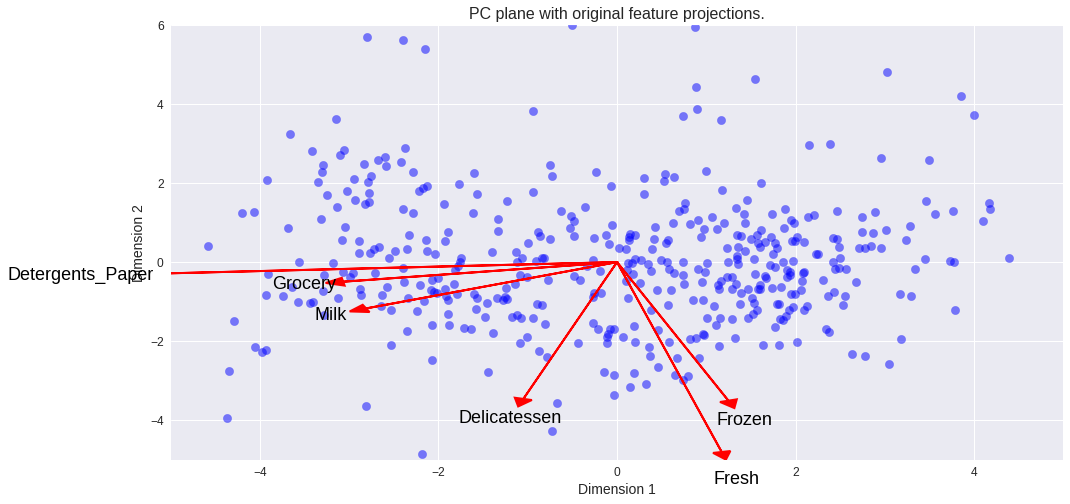

In [28]:
# Create a biplot
_ = vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner ( *lower left, since the first two dimensions seems to be rotated )* of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

* From the biplot, ** Detergents_Paper, Grocery and Milk** are strongly correlated with the first component
* ** Fresh, Deli and Frozen ** are correlated with the second component

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
* K-Means Clustering is very easy to implement and understand. Even concerning the metric, for the most parts just the good old Euclidian metrics applies and even if it doesn't, the other metrics are easily understandable. The only hyperparameters that needed experiment and tuning is the number of clusters. But it's considered hard clustering, i.e., a sample either belongs to one cluster or the other and there is no middle ground. 
* Gaussian Mixture Model, as the name implies, assumes the features come from a mixture of Gaussian Distributions. We know that Gaussian Distributions is a wonderful modeling tool but in real world applications the distributions don't normally follow a Standard Gaussian Distribution - it's often skewed or have more than one peak ( multimodal ) - so a mixture of more than one Standard Gaussian Distribution could model well the real world distribution. As a distribution the clustering membership  weights are assign as probabilities and not definite categories, this is called soft clustering.
* Hard Clustering could be a problem to apply to our dataset, since there is no clear cut rule of thumb to determine the customers' buying habits. There are customers who will buy groceries, milk and cleaning products and almost none of the other products but there is also customers who will buy only Milk and Groceries and no Cleaning products and so on. So a hard clustering probably miss a lot of the underlying customer habits. 
* After applying feature scaling we can see *multimodal distributions* in Milk, Groceries and Detergents_Paper, so a GMM seems to be a good fit to cluster. 


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

highest_score = -1
scores = []
n_components_range = range(2, 7) # Since we have 6 features in the data this seemed reasonable
cv_types = ['spherical', 'tied', 'diag', 'full']

for cv_type in cv_types:
    for n_components in n_components_range:
        
        # Fit the model with the parameters above
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type, 
                              random_state=42)
        
        # Apply your clustering algorithm of choice to the reduced data 
        clusterer = gmm.fit(reduced_data)

        # Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)
        
        # Find the cluster centers
        centers = clusterer.means_

        # Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        try:
        
            # Calculate the mean silhouette coefficient for the number of clusters chosen
            score = silhouette_score(reduced_data, preds)
        
        except ValueError:
            
            print("For the pair Covariance: {}\n"
                  "# of Components {}\n"
                  "the # clusters predicted is only 1,"
                  "so it's not possible to apply the"
                  "Silhouette Score\n".format(cv_type, n_components))
            next
            
        #score = clusterer.bic(reduced_data)
        
        scores.append(score)
        
        if scores[-1] > highest_score:
            highest_score = scores[-1]
            best_gmm = clusterer            
        
        print("Score for covariance type {} and {} # of components: {:.4f}".format(cv_type, n_components, score))
        
    print(65 * "=")
    print('\n')

print("\nBest Model: \n\n"
      "Covariance type: {} \n"
      "# of Components: {} \n"
      "Hihest Score: {:.4f}".format(best_gmm.covariance_type,
                                best_gmm.n_components,
                                highest_score))

# Save the Best Model based on Silhouette Score
preds = best_gmm.predict(reduced_data)
centers = best_gmm.means_
sample_preds = best_gmm.predict(pca_samples)

Score for covariance type spherical and 2 # of components: 0.4239
Score for covariance type spherical and 3 # of components: 0.4024
Score for covariance type spherical and 4 # of components: 0.3196
Score for covariance type spherical and 5 # of components: 0.3019
Score for covariance type spherical and 6 # of components: 0.3013


Score for covariance type tied and 2 # of components: 0.4232
Score for covariance type tied and 3 # of components: 0.3832
Score for covariance type tied and 4 # of components: 0.3073
Score for covariance type tied and 5 # of components: 0.3226
Score for covariance type tied and 6 # of components: 0.3450


Score for covariance type diag and 2 # of components: 0.4237
Score for covariance type diag and 3 # of components: 0.4067
Score for covariance type diag and 4 # of components: 0.3163
Score for covariance type diag and 5 # of components: 0.3127
Score for covariance type diag and 6 # of components: 0.3408


Score for covariance type full and 2 # of components: 

### Code below adapted from the [sklearn GMM documentation]( http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py)

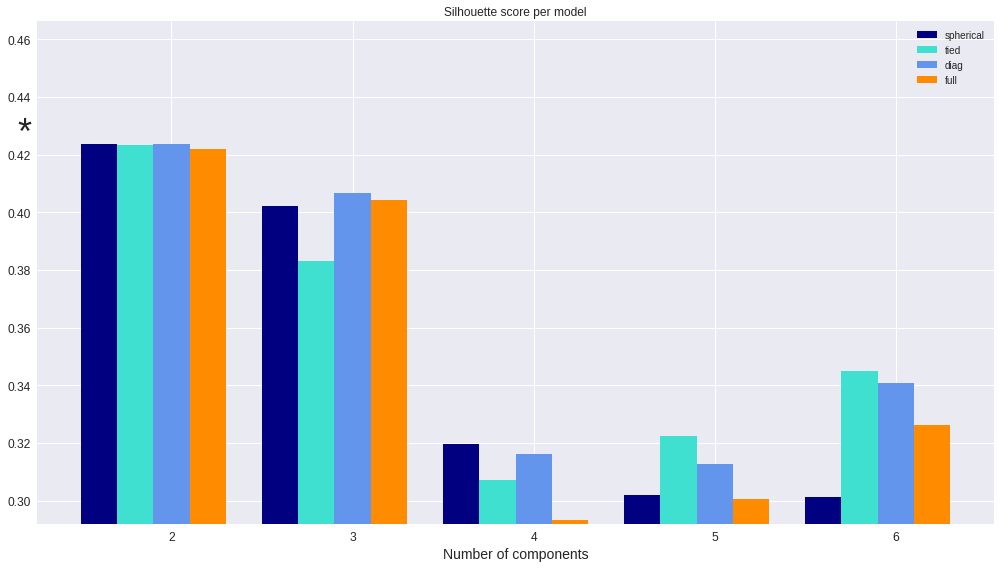

In [30]:
from scipy import linalg

scores = np.array(scores)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []


# Plot the Silhouette scores
#spl = plt.subplot(2, 1, 1)
plt.figure(figsize=(14,8))

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, scores[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
    
plt.xticks(n_components_range)
plt.ylim([scores.min() * 1.01 - .01 * scores.max(), scores.max()*1.1 ])
plt.title('Silhouette score per model')
xpos = np.mod(scores.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(scores.argmin() / len(n_components_range))
plt.text(xpos - 2.1, scores.max(), '*', fontsize=36)
plt.xlabel('Number of components')
_ = plt.legend([b[0] for b in bars], cv_types)
_ = plt.tight_layout()

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* The Best Scores for varying # of components were:
   * **2 Components, Type: Spherical, Score: 0.4239 - Chosen**
   * 3 Components, Type: Diag, Score: 0.4067
   * 4 Components, Type: Spherical, Score: 0.3196
   * 5 Components, Type: Tied, Score: 0.3226
   * 6 Components, Type: Tied, Score: 0.3450
   

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

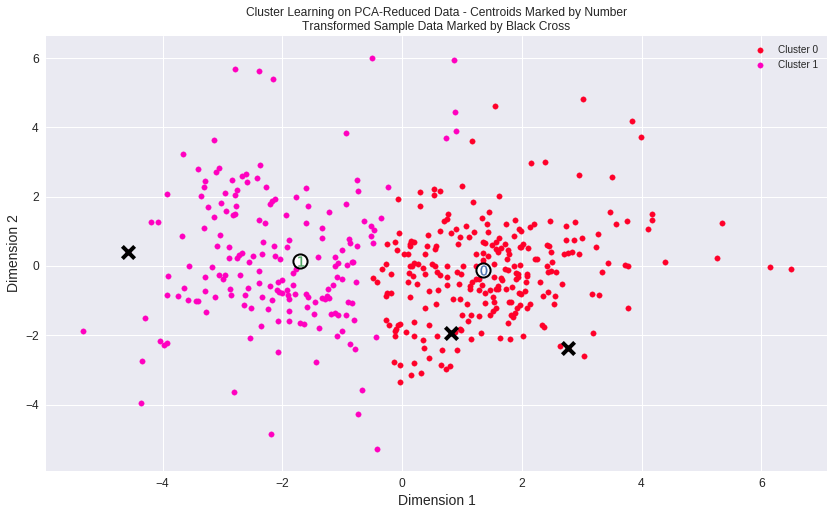

In [31]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [32]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8716.0,2003.0,2627.0,2047.0,325.0,698.0
Segment 1,4374.0,6547.0,9846.0,1043.0,3198.0,971.0


In [33]:
true_centers_with_mean = true_centers.copy()

true_centers_with_mean = true_centers_with_mean.append(samples_mean)

true_centers_with_mean.transpose()

,Segment 0,Segment 1,mean
Fresh,8716.0,4374.0,12000.297727
Milk,2003.0,6547.0,5796.265909
Grocery,2627.0,9846.0,7951.277273
Frozen,2047.0,1043.0,3071.931818
Detergents_Paper,325.0,3198.0,2881.493182
Delicatessen,698.0,971.0,1524.870455


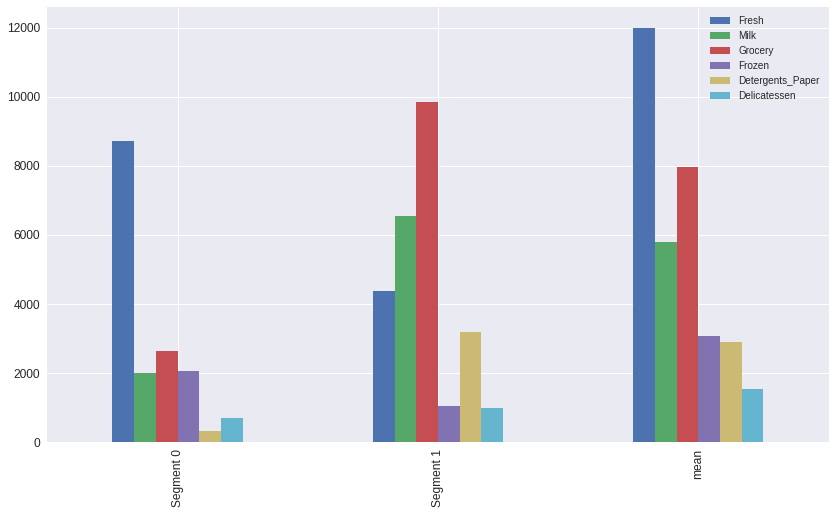

In [34]:
_ = true_centers_with_mean.plot(kind='bar', figsize=(14,8))

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

* On Segment 0, the total spending is below average for all products.  
* On Segment 1, the total spending is above average on Groceries, Milk and Detergents_Paper one hand and below on Fresh, Frozen and Delicatessen on the other the total purchases are all below average and also below the total from Segment 0, except for Delicatessen
* Since the data is highly skewed, it's insufficient and maybe deceiving to make comparisons based just by the means, i.e. there is a lot of variability inside those segments as well. We saw earlier outliers in all categories of products and those greatly affect the mean since we got rid of only those which appeared in more than one category. 
* Nevertheless we can say that Segment 1 seems to represent big customers like supermarkets, since the above average purchases are common items found in supermarkets, groceries stores and similar ones.
* Segment 0 are smaller customers than Segment 1, more focused on Fresh Products and also Frozen ones. It could be diferent types of restaurants, cafes or any other segment focused on serving fresh meals. 

### Question 9

* For each sample point, which customer segment from **Question 8** best represents it? 
* Are the predictions for each sample point consistent with this?

Run the code block below to find which cluster each sample point is predicted to be.

In [35]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

* The predictions for sample 1 and 3 were some sort of Meal Service and a retail for Sample 2

* The Clusters are consistent with predictions made before, Sample points 1 and 3 are in the same segment, Segment 0, while Sample 2 is Segment 1.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

* Different customers have different needs, specially for such different segments like those clusters and probably inside the clusters as well the effect can be different for different subclusters within one cluster.
* One way to determine which groups of customers is affected the most, positively or negatively, is to run an A/B test to each segment. One portion of segment 0 gets 5 days/week delivery and the other portion gets offered the 3 days/week and the same is done for segment 1.
* This could be refined to more subgroups inside the the segments, i.e. further clustering applied to the segments.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
* The customers segments resulted from the clustering algorithm is the target variable for a supervised learner algorithm trained on the original customers. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

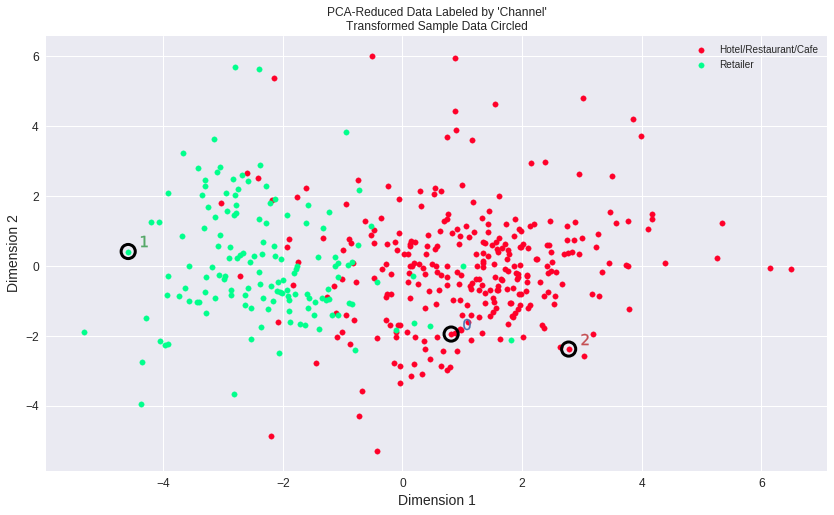

In [36]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

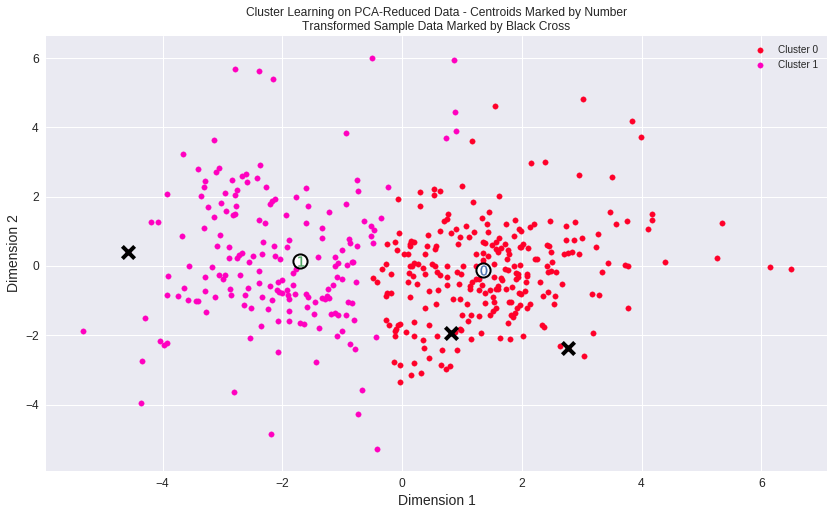

In [37]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* Overall the clustering algorithm made a pretty good job segmenting both types of customers, but there is a lot of misclassified points not only on the boundary but also clearly inside the other segment, the spread of the points across both dimensions is also very high, supporting the subsegments inside the segments mentioned before. In terms of purchases, there are Hotels/Restaurants/Cafés that behaves just like the average retailer and vice-versa, which tells us that segmenting only on the overall mean purchase cost doesn't give us thoroughly refined classification but the segmentation given based just on that is impressive nonetheless.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.